In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('grocery_data.csv')


In [2]:
print(df.tail(5))

                                       Name Current Price Previous Price  \
17254                    Beef Sausage Rolls          8.79           8.79   
17255  Creamy Chicken and Vegetable Pot Pie          8.00           8.00   
17256                     Quiche Florentine          8.00           8.00   
17257                             Green Tea          2.29           2.29   
17258             Hard-boiled Eggs, Omega-3          1.29           1.29   

       Price Per Each        Category   Product ID  \
17254      $1.40/100g  Quiches & Pies  21116219_EA   
17255  $1,600.00/100g  Quiches & Pies  21401776_EA   
17256      $1.60/100g  Quiches & Pies  21401761_EA   
17257     $0.48/100ml       Beverages  20923222_EA   
17258      $1.47/100g   Snacks & Dips  21049546_EA   

                                             Product URL Amount Units  
17254  https://www.realcanadiansuperstore.ca/beef-sau...    630     g  
17255  https://www.realcanadiansuperstore.ca/creamy-c...    500     g  
17

In [3]:

# Handling missing values

# Assuming df is your DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


Name              0
Current Price     0
Previous Price    0
Price Per Each    0
Category          0
Product ID        0
Product URL       0
Amount            0
Units             0
dtype: int64


In [4]:
import pandas as pd

# Looking for any NaN values 
if df.isna().values.any():
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values in the DataFrame.")


No NaN values in the DataFrame.


In [5]:
data_types = df.dtypes

# Display the data types of each column
print(data_types)

Name              object
Current Price     object
Previous Price    object
Price Per Each    object
Category          object
Product ID        object
Product URL       object
Amount            object
Units             object
dtype: object


In [11]:
import pandas as pd


numeric_columns = ['Current Price', 'Previous Price', 'Price Per Each', 'Amount', 'Units']

# Convert specified columns to numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display the updated data types
print(df.dtypes)


Name               object
Current Price     float64
Previous Price    float64
Price Per Each    float64
Category           object
Product ID         object
Product URL        object
Amount            float64
Units             float64
dtype: object


In [12]:
# Check for negative current prices
negative_prices = df[df['Current Price'] < 0]

# Display rows with negative current prices
if not negative_prices.empty:
    print("Rows with negative current prices:")
    print(negative_prices)
else:
    print("No negative current prices found.")



No negative current prices found.


In [13]:
from scipy import stats

# Assuming 'Current Price' is the column with potential outliers
z_scores = stats.zscore(df['Current Price'])

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Find positions where the z-score exceeds the threshold
outlier_positions = (z_scores > threshold) | (z_scores < -threshold)

# Display rows with potential outliers
outliers_df = df[outlier_positions]
print("Rows with potential outliers:")
print(outliers_df)


Rows with potential outliers:
Empty DataFrame
Columns: [Name, Current Price, Previous Price, Price Per Each, Category, Product ID, Product URL, Amount, Units]
Index: []


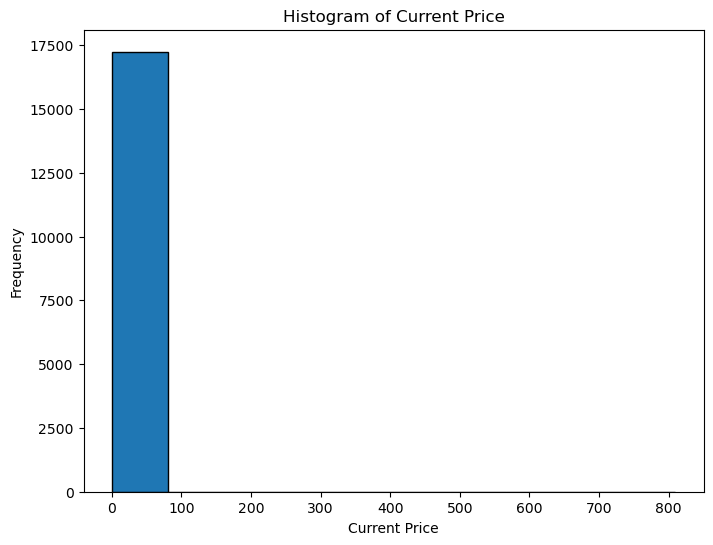

In [14]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))
plt.hist(df['Current Price'], bins=10, edgecolor='black')
plt.title('Histogram of Current Price')
plt.xlabel('Current Price')
plt.ylabel('Frequency')
plt.show()


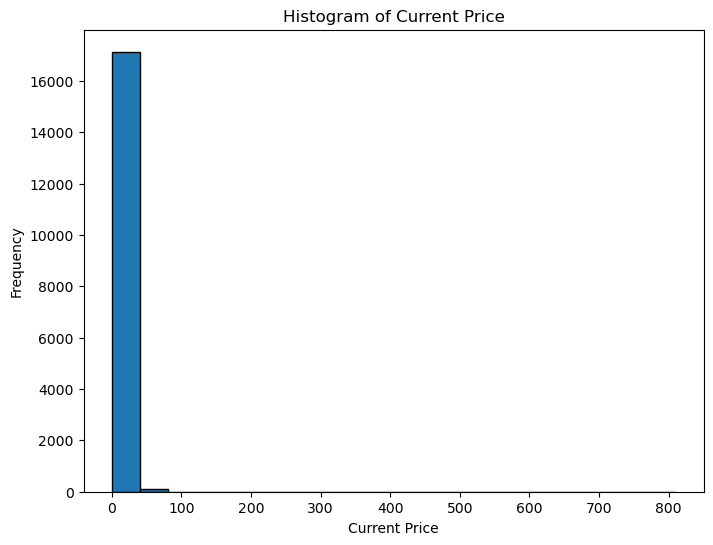

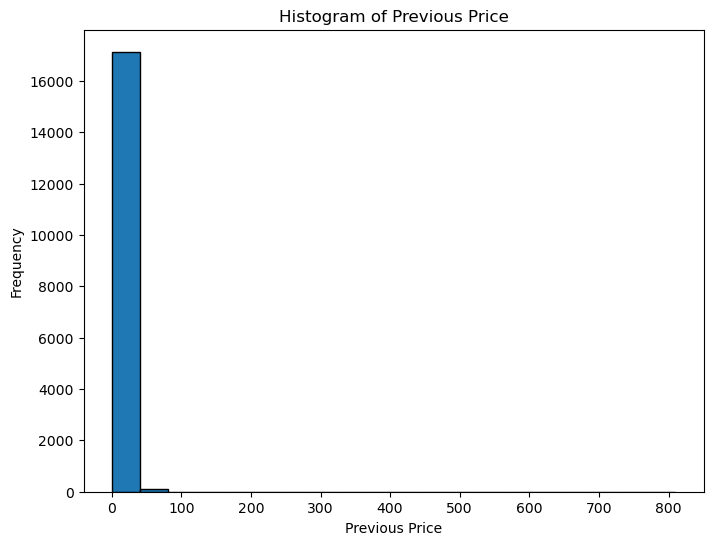

C:\Users\srava\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\srava\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

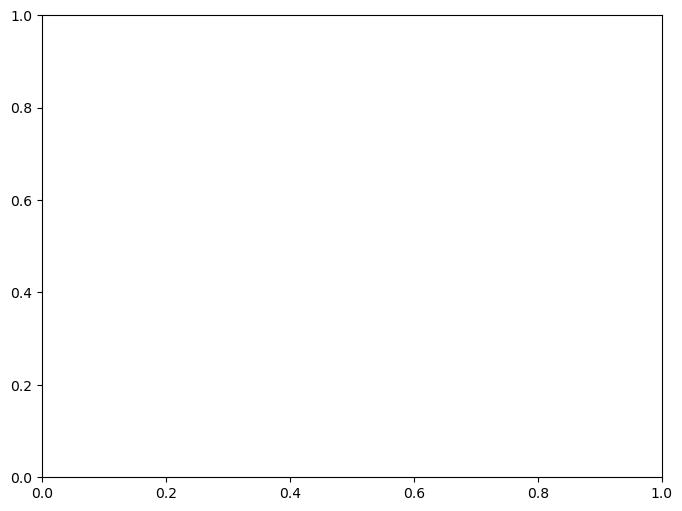

In [15]:
import matplotlib.pyplot as plt

# Create histograms for all numeric columns
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8,6))
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



In [16]:


product_id_to_check = '20143381001_KG'

# Check the 'Current Price' and 'Previous Price' for the single product
product_rows = df[df['Product ID'] == product_id_to_check]

if not product_rows.empty:
    current_price = product_rows['Current Price'].iloc[0]
    previous_price = product_rows['Previous Price'].iloc[0]

    print(f"For product ID {product_id_to_check}:")
    print(f"Current Price: {current_price}")
    print(f"Previous Price: {previous_price}")
else:
    print(f"No data found for product ID {product_id_to_check}.")


For product ID 20143381001_KG:
Current Price: 0.39
Previous Price: 0.53


In [17]:
## feature engineering 
# Price Change
df['Price_change_percentage'] = ((df['Current Price'] - df['Previous Price']) / df['Previous Price']) * 100
print(df.head(14))

                               Name  Current Price  Previous Price  \
0                  English Cucumber           1.99            1.99   
1                       Green Onion           1.29            1.29   
2   Bi-Colour Corn, Corn on the Cob           0.99            0.99   
3             Romaine Heart, 3 Pack           6.00            6.00   
4                   Red Peppers               2.38            2.38   
5                     Yellow Onions           2.99            2.99   
6                     Celery Stalks           3.49            3.49   
7                   Lettuce Iceberg           3.99            3.99   
8                          Broccoli           3.99            3.99   
9                         Red Onion           2.03            2.03   
10            Tomato Beefsteak  Red           1.47            1.47   
11                         Zucchini           0.92            1.23   
12                      Cauliflower           4.49            4.49   
13              Swee

In [18]:
# Product Id Frequency 
df['Product_id_frequency'] = Product_Id_frequency.groupby('PD')['Product ID'].transform('count')
print(df.head(5))

                              Name  Current Price  Previous Price  \
0                 English Cucumber           1.99            1.99   
1                      Green Onion           1.29            1.29   
2  Bi-Colour Corn, Corn on the Cob           0.99            0.99   
3            Romaine Heart, 3 Pack           6.00            6.00   
4                  Red Peppers               2.38            2.38   

   Price Per Each          Category      Product ID  \
0             NaN  Fresh Vegetables  20070132001_EA   
1             NaN  Fresh Vegetables  20107500001_EA   
2             NaN  Fresh Vegetables  20131170001_EA   
3             NaN  Fresh Vegetables  20067389001_EA   
4             NaN  Fresh Vegetables  20007535001_KG   

                                         Product URL  Amount  Units  \
0  https://www.realcanadiansuperstore.ca/english-...     1.0    NaN   
1  https://www.realcanadiansuperstore.ca/green-on...     1.0    NaN   
2  https://www.realcanadiansuperstore.ca/

In [23]:
#unitprice
df['Unit_price'] = df['Current Price'] / df['Price Per Each']


In [20]:
# Question:1
category_frequencies = df.groupby('Category')['Product_id_frequency'].sum()

# Find the most popular category
most_popular_category = category_frequencies.idxmax()

print(f"The most popular category is: {most_popular_category}")


The most popular category is: Chips & Snacks


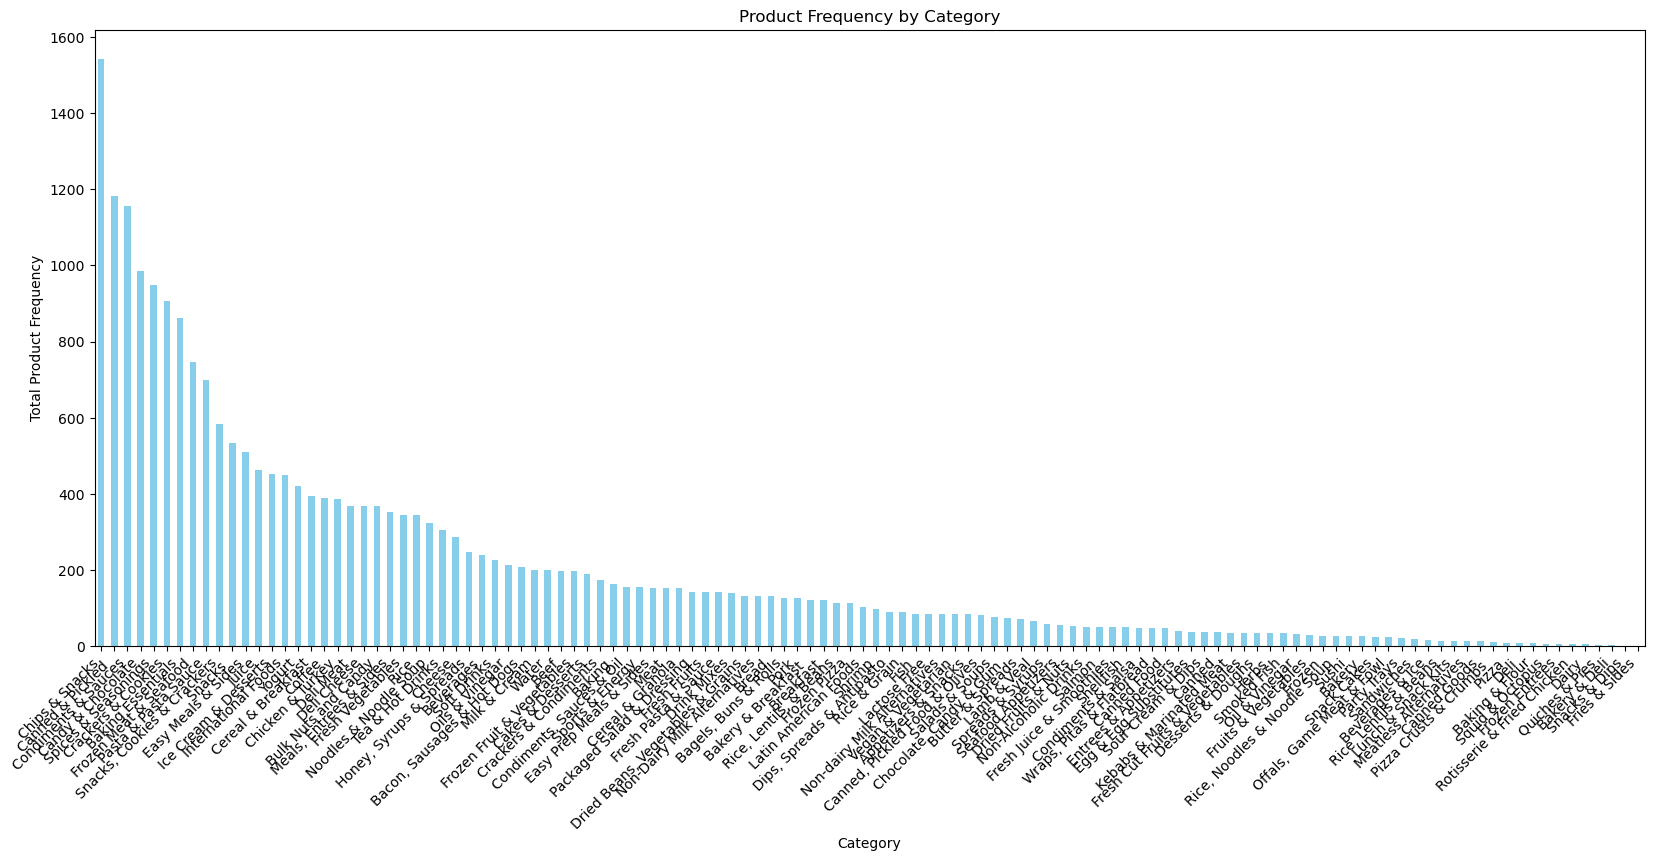

In [21]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
category_frequencies = df.groupby('Category')['Product_id_frequency'].sum()

# Sort categories by frequency in descending order
sorted_categories = category_frequencies.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(20,8))
sorted_categories.plot(kind='bar', color='skyblue')
plt.title('Product Frequency by Category')
plt.xlabel('Category')
plt.ylabel('Total Product Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


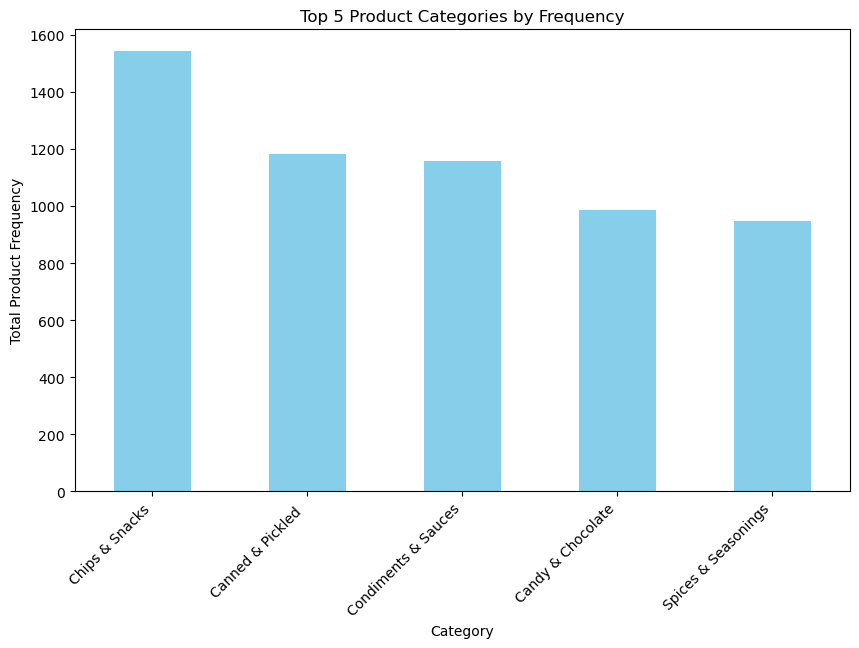

In [22]:
import matplotlib.pyplot as plt

# top 5 
category_frequencies = df.groupby('Category')['Product_id_frequency'].sum()

# Sort categories by frequency in descending order
sorted_categories = category_frequencies.sort_values(ascending=False)

# Select the top 5 categories
top5_categories = sorted_categories.head(5)

# Create a bar plot for the top 5 categories
plt.figure(figsize=(10, 6))
top5_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Product Categories by Frequency')
plt.xlabel('Category')
plt.ylabel('Total Product Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [24]:
##saving the modified dataframe into a csv 
df.to_csv('output_file.csv', index=False)
